In [ ]:
from keras import layers,models
from keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

Se importara un dataset con  ceca de 11228 noticias de una televisora categorizadas de en 46 temas distintos 

In [ ]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000) #importando las 10000 palabras mas comunes

In [ ]:
train_data[0]

In [ ]:
word_index = reuters.get_word_index()
word_index = dict([(value,key)for (key,value)in word_index.items()])
for i in train_data[0]:
  print(word_index.get (i-3))

In [ ]:
train_labels[0]

3

In [ ]:
#convirtiendo la data en tensor
def vectorizar(sequences,dim=10000):                 ## esto generara arreglos donde llenara de 1 cada posicion que 
  results = np.zeros((len(sequences),dim))           ## encuentre un simil de la entrada sequences 
  for i ,sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [ ]:
x_train= vectorizar(train_data)
x_test= vectorizar(test_data)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
## haciendo one hot encoding  a los labels
y_train= to_categorical(train_labels)
y_test= to_categorical(test_labels)

In [ ]:
#ahora la forma que tienen  las etiquetas es la de una matriz donde esta marcado como 1 la posicion de la matriz correspondiente a la categoria
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Creando el modelo
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) #softmax es muy buena funcion de activacion para calsificacion multiple

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train=x_train[1000:]

y_val = y_train[:1000]
partial_y_train=y_train[1000:]


In [ ]:
history=model.fit(partial_x_train,partial_y_train,
          epochs=9,                             ## al entrenar con epochs=30 se podia ver que el mayor accuracy  con la dat de validacion se daba al rededor del 
          batch_size=512,                        ## epochs = 9 por eso se reentrena con este numero
          validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 2s 52ms/step - loss: 2.5665 - accuracy: 0.5159 - val_loss: 1.7114 - val_accuracy: 0.6310
Epoch 2/9
16/16 [==============================] - 0s 24ms/step - loss: 1.4237 - accuracy: 0.6938 - val_loss: 1.3025 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 0s 23ms/step - loss: 1.0613 - accuracy: 0.7690 - val_loss: 1.1417 - val_accuracy: 0.7510
Epoch 4/9
16/16 [==============================] - 0s 21ms/step - loss: 0.8353 - accuracy: 0.8212 - val_loss: 1.0405 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6698 - accuracy: 0.8593 - val_loss: 0.9683 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5292 - accuracy: 0.8918 - val_loss: 0.9141 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 20ms/step - loss: 0.4267 - accuracy: 0.9129 - val_loss: 0.8948 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

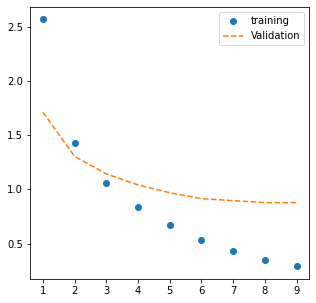

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] 
fig = plt.figure(figsize=(5,5))


epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='Validation') 
plt.legend()
plt.show()

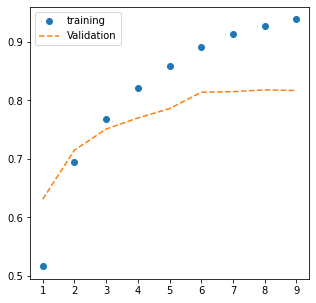

In [ ]:
#valor de acurraacy
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy'] 

fig = plt.figure(figsize=(5,5))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='Validation') 
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)   
                               

71/71 [==============================] - 0s 4ms/step - loss: 0.9839 - accuracy: 0.7885


[0.9838538765907288, 0.7885128855705261]

In [ ]:
## haciendo predicciones
predictions = model.predict(x_test) ## haciendo predicciones apartir de x_tes

In [ ]:
#mostramos un elemento de la prediccion
print(predictions[0])  # recordemos que la capa de salida tiene 46 neuronas
print(np.sum(predictions[0]))  

[7.2283794e-05 1.5308055e-04 3.2479133e-05 7.9654491e-01 1.9223270e-01
 3.0689878e-06 6.8410459e-06 8.4562598e-06 2.0905263e-03 1.6047898e-05
 1.3286918e-05 3.5215276e-03 1.3492572e-04 6.8488601e-04 8.9631074e-05
 2.4380765e-07 5.3661456e-04 4.2017935e-05 1.8608309e-05 1.2596579e-03
 9.0425904e-04 4.7829348e-04 6.4262706e-05 1.8752682e-05 1.2543670e-05
 3.8842121e-05 9.4314364e-06 6.8206168e-06 9.6669091e-06 2.0298618e-05
 3.8696522e-05 4.8032874e-05 2.6814014e-05 1.2419323e-06 2.6274464e-04
 1.7341600e-06 4.6654083e-04 4.4207187e-05 1.2600477e-05 3.9989740e-05
 1.5578518e-05 3.1639238e-06 4.1060857e-06 5.2700616e-06 2.8780473e-06
 1.4975478e-06]
0.99999994


In [ ]:
np.argmax(predictions[0]) # con esto hacemos la preddicion real  con el metodo argmax

3

In [ ]:
### como reto se debe hacer el tratamiento necesario para reducir el overfitting